# **MNIST Handwritten Digit Classification**

Implementem duas redes neurais artificiais para o problema de classificação de dígitos escritos à mão utilizando a base de dados do MNIST, disponível em: http://yann.lecun.com/exdb/mnist. A primeira rede deve ser uma rede neural perceptron de múltiplas camadas clássica, e a segunda deve ser uma Rede Neural Convolucional (CNN).

Compare o desempenho das duas redes analisando a curva de erro médio e a matriz de confusão.

**Importando as bibliotecas**

In [201]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix, accuracy_score

# Parte 1 - Obtenção do Dataset

**Baixando os dados**

In [202]:
mnist = tf.keras.datasets.mnist

**Divisão do Dataset**

In [203]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#normalizando os dados
x_train, x_test = x_train / 255.0, x_test / 255.0

**Verificando o tamanho do dataset**

In [204]:
print('Dados de treino:',len(x_train))

Dados de treino: 60000


In [205]:
print('Dados de teste:',len(x_test))

Dados de teste: 10000


In [206]:
print('Tamanho de cada exemplo:', x_train[0].shape)

Tamanho de cada exemplo: (28, 28)


**Verificando os dados do dataset**

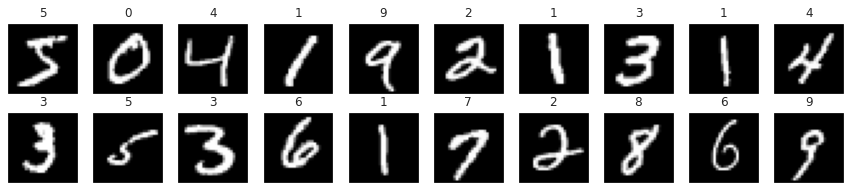

In [207]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_train[i]), cmap='gray')
 ax.set_title(y_train[i])

**Divisão do dataset de treinamento**

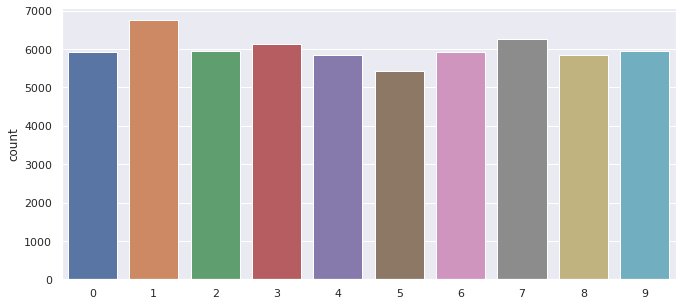

In [208]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(11,5))
p =sns.countplot(x=y_train)         
plt.show()

# Parte 2 - Rede Neural Perceptron de Múltiplas Camadas Clássica

**Construção da Rede**

In [209]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [210]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treinamento da Rede**

In [211]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [212]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3250 - accuracy: 0.9065 - val_loss: 0.1590 - val_accuracy: 0.9551
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1593 - accuracy: 0.9539 - val_loss: 0.1146 - val_accuracy: 0.9667
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1182 - accuracy: 0.9645 - val_loss: 0.1007 - val_accuracy: 0.9704
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0955 - accuracy: 0.9714 - val_loss: 0.0892 - val_accuracy: 0.9738
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9743


[0.07950489223003387, 0.9743000268936157]

**Verificando a Acurácia**

In [213]:
y_pred = model.predict(x_test)

In [214]:
precisao = accuracy_score(y_test, np.argmax(y_pred, axis = 1))
print("Acurácia do modelo:", np.round(precisao*100,2),'%')

Acurácia do modelo: 97.43 %


**Curva de Erro**

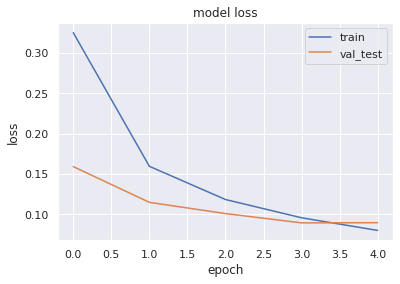

In [215]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_test'], loc='upper right')
plt.show()

**Matriz de Confusão**

In [216]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred.argmax(axis=1))

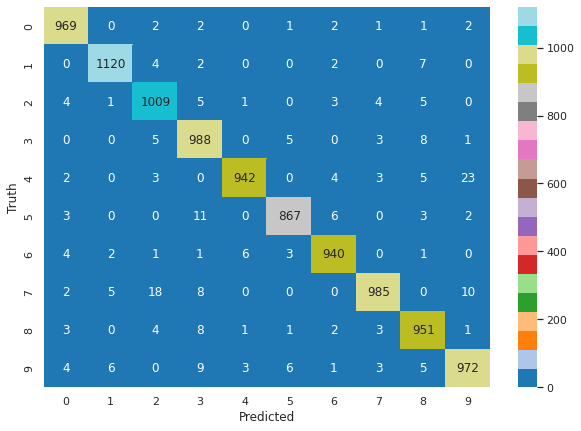

In [217]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="tab20")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Parte 3 - Rede Neural Convolucional (CNN)

**Preparação do Dataset**

In [218]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [219]:
for name, i in zip("x_train,y_train,x_test,y_test".split(","), [x_train, y_train,x_test, y_test]):
  print(name, i.shape)

x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype("float32")/255

x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype("float32")/255

print("\nafter transformation")

for name, i in zip("x_train,y_train,x_test,y_test".split(","), [x_train, y_train,x_test, y_test]):  
  print(name, i.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)

after transformation
x_train (60000, 28, 28, 1)
y_train (60000,)
x_test (10000, 28, 28, 1)
y_test (10000,)


In [220]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Construção da Rede**

In [221]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(28,28,1)),
  # MaxPooling2D calcula o valor máximo de uma matriz 2x2
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=64, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

In [222]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Treinamento do Modelo**

In [223]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_18 (Flatten)        (None, 576)             

In [224]:
history2 = model.fit(x_train, y_train, validation_split=0.2, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1500/1500 [==============================] - 46s 30ms/step - loss: 0.1562 - accuracy: 0.9509 - val_loss: 0.0670 - val_accuracy: 0.9808
Epoch 2/5
1500/1500 [==============================] - 44s 30ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 0.0501 - val_accuracy: 0.9853
Epoch 3/5
1500/1500 [==============================] - 44s 30ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0493 - val_accuracy: 0.9862
Epoch 4/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0427 - val_accuracy: 0.9883
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0332 - accuracy: 0.9914


[0.03324606642127037, 0.9914000034332275]

**Verificação da Acurácia**

In [225]:
y_pred = model.predict(x_test)

In [226]:
y_pred.argmax(axis=1), y_test.argmax(axis=1)

(array([7, 2, 1, ..., 4, 5, 6]), array([7, 2, 1, ..., 4, 5, 6]))

In [227]:
precisao = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Acurácia do modelo:", np.round(precisao*100,2),'%')

Acurácia do modelo: 99.14 %


**Curva do Erro**

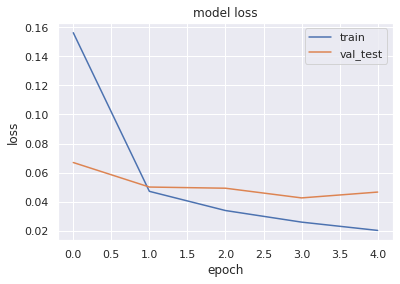

In [228]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_test'], loc='upper right')
plt.show()

**Matriz de Confusão**

In [229]:
cm_cnn = tf.math.confusion_matrix(labels=y_test.argmax(axis=1), predictions=y_pred.argmax(axis=1))

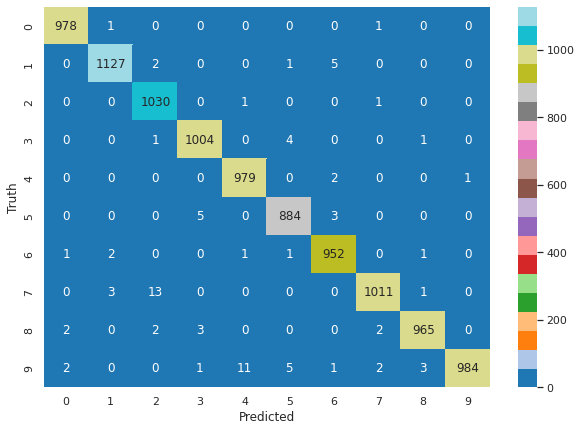

In [230]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_cnn, annot=True, fmt='d',cmap="tab20")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Comparação da curva de erro das duas redes construídas**

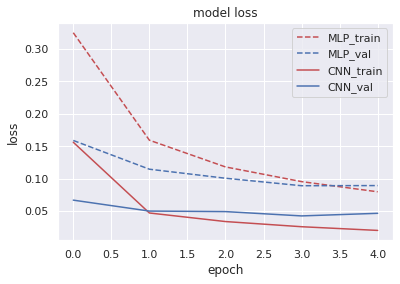

In [231]:
plt.plot(history.history['loss'],'r--')
plt.plot(history.history['val_loss'],'b--')
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MLP_train','MLP_val','CNN_train', 'CNN_val'], loc='upper right')
plt.show()

**Realizando predições**

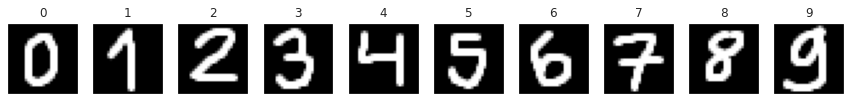

In [232]:
fig = plt.figure(figsize=(15,3))
for i in range(10):
 img = cv2.imread(str(i)+'.png')
 ax = fig.add_subplot(1,10, i+1, xticks=[], yticks=[])
 ax.imshow(img, cmap='gray')

 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 newimg = tf.keras.utils.normalize(gray, axis = 1)
 newimg = np.array(newimg).reshape(1, 28, 28, 1)

 predictions = model.predict(newimg)
 ax.set_title(np.argmax(predictions[0]))